# Sprint Challenge
## *Data Science Sprint 13*

After a sprint of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). The data is sampled for you to something more manageable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. 

## Challenge Objectives
Successfully complete all these objectives to earn full credit. 

**Successful completion is defined as passing all the unit tests in each objective.**  

There are 8 total possible points in this sprint challenge. 


There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on Yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

3) **Comment out the cell that generates a pyLDAvis visual in objective 4 (see instructions in that section).** 
____

### Part 0: Import Necessary Packages
For this section, you will need to import:
- `spacy` 
- `Pandas`
- `Seaborn`
- `Matplotlib`
- `NearestNeighbors`
- `Pipeline` 
- `TfidfVectorizer`
- `KneighborsClassifier`
- `GridSearchCV`
- `corpora`
- `LdaModel`
- `gensim`
- `re`

> **Note: This assignment is optimized to work with these specific packages. You can use import different packages, but note that this may affect how CodeGrade works, and may cause CodeGrade to fail.**

In [48]:
# YOUR CODE HERE
# raise NotImplementedError()
import re
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import gensim.corpora as corpoora
from gensim.models.ldamodel import LdaModel

In [49]:
# Visible Testing
assert pd.__package__ == 'pandas'




### Part 0: Import Data

In [50]:


# Load reviews from URL
# data_url = 'C:/Users/ISHMO_CT/Downloads/Bloomtech/Natural_proc/NLP/sprint_challenge/review_sample.json'
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'

# Import data into a DataFrame named df
# YOUR CODE HERE

df = pd.read_json(data_url, lines=True)

df.head()

# raise NotImplementedError()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [51]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- Accept one document at a time
- Return a list of tokens

You are free to use any method you have learned this week.

**TO PASS CODEGRADE RUNTIME:**
- Do not run your tokenize function more than one time in your notebook! It is not needed until Part 4!

In [52]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.
# We can use spcy model to tokenise or the .split()  The spacy model can clean the data for you but if you are using .split ypu need to clean the text i.e punctuation and etc
nlp = spacy.load('en_core_web_sm')

In [53]:
# We are cleannnig the doc and tokenizing using spacy model at the same time
def tokenize(doc):
    doc = doc.lower()
    # Remove punctuation
    doc = re.sub(r'[^\w\s]', '', doc)
    # Remove numbers
    doc = re.sub(r'\d+', '', doc)
    # Remove extra whitespace
    doc = doc.strip()
    tokens = [token.text for token in nlp(doc) if not token.is_punct and not token.is_stop]
    return tokens

df['tokens'] = df['text'].apply(lambda x: tokenize(x))
    

In [54]:
'''Testing'''
assert isinstance(tokenize(df.sample(n=1)["text"].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews (i.e. create a doc-term matrix).
    * Name that doc-term matrix `dtm`

In [55]:
# %%time
# YOUR CODE HERE
# In vectrising we casn use word embeddings or TF-IDF (Term Frequency-Inverse Document Frequency
#  to create document term matrix scikit-learn's TfidfVectorizer or CountVectorizer depending on your needs
# we are going to use TfidfVectorizer

# instatiate 
tfidfVectorizer = TfidfVectorizer()

# create the dtm
dtm = tfidfVectorizer.fit_transform(df['tokens'].apply(lambda x: ' '.join(x)))
# print(dtm)

# raise NotImplementedError()


2. Write a fake review. Assign the text of the review to an object called `fake_review`. 
3. Query the fake review for the 10 most similar reviews, print the text of the reviews. 
    - Given the size of the dataset, use `NearestNeighbors` model for this. Name the model `nn`.

In [56]:
# In short we are comparing out dtm with the fake review?
# This helps us to know some positive or negative massage

#  first we Create and fit a NearestNeighbors model named "nn"
# YOUR CODE HERE
# Build the Nearest Neighbors Model
nn = NearestNeighbors(n_neighbors=10, metric='cosine')
nn.fit(dtm)

# raise NotImplementedError()

NearestNeighbors(metric='cosine', n_neighbors=10)

In [57]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

In [58]:
# Create a fake review and find the 10 most similar reviews

# YOUR CODE HERE
fake_review = 'This place is amzing, the food was delicious and service was excellent.'
# vectorise the fake fake_review
fake_review_vectorised = tfidfVectorizer.transform([fake_review])

# Query for the 10 Most Similar Reviews
distance, indices = nn.kneighbors(fake_review_vectorised)

# Print the 10 most similar reviews
for idx in indices[0]:
    print(df.loc[idx, 'text'])

# raise NotImplementedError()

This place has excellent service and they work as a team! Food was excellent. Highly recommend!
Very yummy! Food and service were excellent!
Excellent place!, excellent service, good food, expect to pay about 20.00 for a burger but its an experience and its vegas!!
what a sweet little coffee shop. Only been  open a few months. The people are super nice the coffee is excellent excellent excellent excellent excellent and who could ask for anything more.
Excellent service! Excellent food! Kevin is a great server with excellent customer service skills. He engages the guests and keeps us coming back.
So delicious! Will be back with my kids and husband! Great service and food!
Fast and delicious! Excellent customer service as well. Salad is larger than expected, will be back again very soon!
This place is a perfect BBQ place .. every time I come it's excellent food I think is one of the top places to try in Arizona
We arrived at 6 to an empty restaurant without reservations.  We were surpris

In [59]:
# Visible Testing
assert isinstance(fake_review, str), "Did you write a review in the correct data type?"

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier.
    - Use that pipeline to train a model to predict the `stars` feature (i.e. the labels). 
    - Use that pipeline to predict a star rating for your fake review from Part 2. 



2. Create a parameter dict including `one parameter for the vectorizer` and `one parameter for the model`. 
    - Include 2 possible values for each parameter
        - **Keep the values for each parameter low. Extreme values will compromise runtime**
    - **Use `n_jobs` = 1** 
    - Due to limited computational resources on CodeGrader `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.`
    
    
3. Train the entire pipeline with a GridSearch
    - Name your GridSearch object as `gs`

In [60]:
# YOUR CODE HERE
# The point of classification is to group the text in to certain measure or topics and rate them with stars column
# We use MultinomialNB() to classify the text column the data but firts vectorise it.

# The GridSearchCV() function in sklearn.model_selection is a powerful tool used for finding the best combination of hyperparameters

from sklearn.naive_bayes import MultinomialNB

# create the Pipeline

pipeline =Pipeline([
    ('tfidfVectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB()),
])


# create a parametr dictionary for gridsearch
parameters = {
    'tfidfVectorizer__max_features': [1000, 2000],
    'classifier__alpha': [0.5, 1.0],
}


# Train the entire pipeline with Grid search
gs = GridSearchCV(pipeline, parameters, n_jobs=1)
gs.fit(df['text'], df['stars'])


# Predict using the trained pipeline
fake_pipeline_prediction = gs.predict([fake_review])
print(fake_pipeline_prediction[0])

# raise NotImplementedError()

5


In [61]:
# Visible Testing
prediction = gs.predict(["This is your prediction statement."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Set num_topics to `5`
    - Name your LDA model `lda`
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

When you instantiate your LDA model, it should look like this: 

```python
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

```

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

## Note about  pyLDAvis

**pyLDAvis** is the Topic modeling package that we used in class to visualize the topics that LDA generates for us.

You are welcomed to use pyLDAvis if you'd like for your visualization. However, **you MUST comment out the code that imports the package and the cell that generates the visualization before you submit your notebook to CodeGrade.** 

Although you should leave the print out of the visualization for graders to see (i.e. comment out the cell after you run it to create the viz). 

### 1. Estimate a LDA topic model of the review text

* Use the `tokenize` function you created earlier to create tokens.
* Create an `id2word` object. 
> Hint: Use `corpora.Dictionary`
* Create a `corpus` object.
> Hint: Use `id2word.doc2bow`
* Instantiate an `lda` model. 

>> Remember to read the LDA docs for more information on the various class attributes and methods available to you in the LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

In [62]:
# Do not change this value 
num_topics = 5

In [63]:
# YOUR CODE HERE

from gensim import corpora
df['tokens'] = df['text'].apply(tokenize) # we are using tje tokeniser function we created back

#  so we create a dictionary represattion of document
id2word = corpora.Dictionary(df['tokens'])

# covert the documents into documnet term matrix
corpus = [id2word.doc2bow(tokens) for tokens in df['tokens']]

# Instatiate the model 
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics=num_topics,
               passes=1)

# print out the topics
# topics = lda.print_topics(num_words=3)

# for topic in topics:
#     print(topic)
# raise NotImplementedError()

#### Testing

In [64]:
# Visible Testing

assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'

#### 2. Create 2 visualizations of the results:
1. Create a visualization using pyLDAvis. Run the cell, then comment out your code before submission, leaving the visualization in the cell.

2. Create a visualization using the matplotlib library and utilizing the subplots function. Assign this visualization to a variable called `visual_plot`.


In [65]:
# Cell for pyLDAvis visualization
# YOUR CODE HERE 
# import pyLDAvis
# import pyLDAvis.gensim_models as gensimis
# import gensim

# prepare the pyLDAvis visualisation
# lda_vis = gensimis.prepare(lda, corpus, id2word)

# Display the visualisation
# pyLDAvis.display(lda_vis)

# To save the visualization to an HTML file 
# pyLDAvis.save_html(lda_vis, 'lda_vis.html'

# raise NotImplementedError()

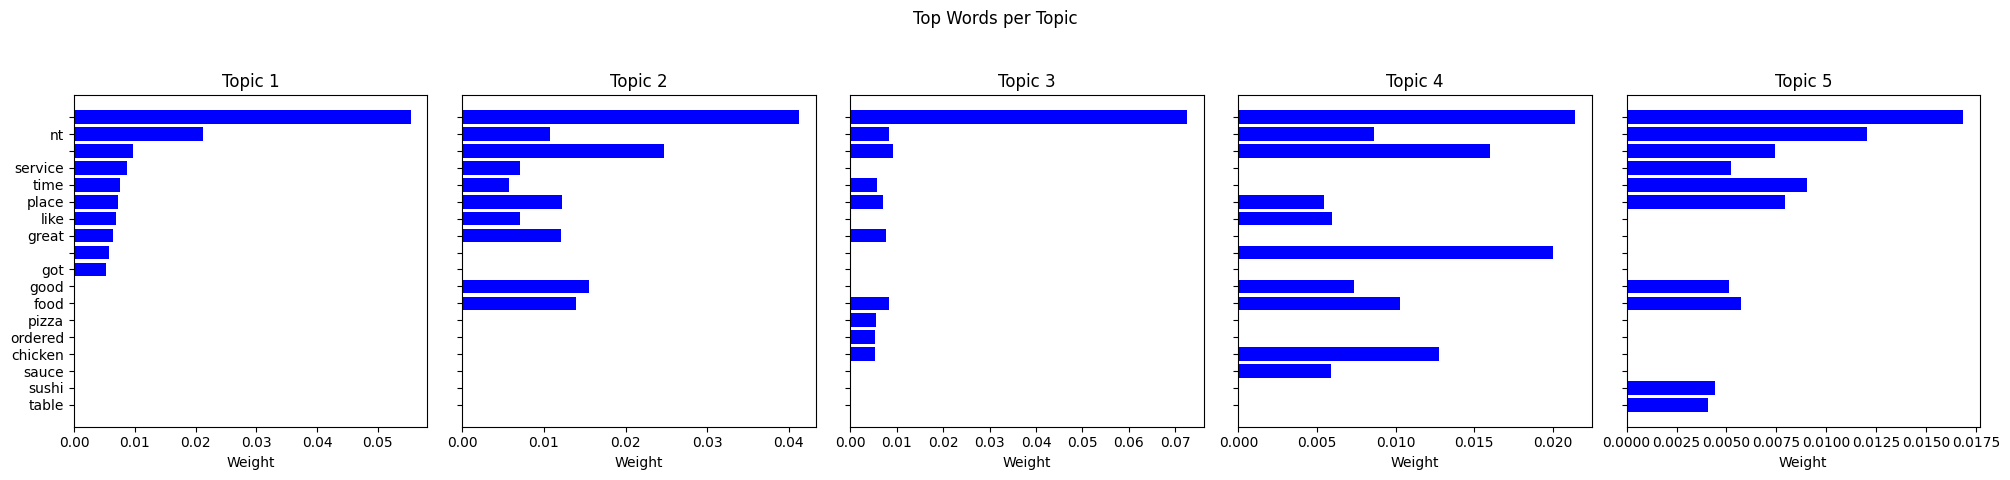

In [66]:
# Cell for matplotlib visualzation
# YOUR CODE HERE
# Define the number of topics
num_topics = 5

# Get the top words for each topic
top_words_per_topic = []
for t in range(num_topics):
    top_words = lda.show_topic(t, topn=10)
    top_words_per_topic.append(top_words)

# Create subplots
fig, axes = plt.subplots(1, num_topics, figsize=(20, 5), sharey=True)
fig.suptitle('Top Words per Topic')

for i, ax in enumerate(axes):
    words, weights = zip(*top_words_per_topic[i])
    ax.barh(words, weights, color='blue')
    ax.set_title(f'Topic {i+1}')
    ax.invert_yaxis()  # Highest weights at the top
    ax.set_xlabel('Weight')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Assign the plot to a variable
visual_plot = fig

# raise NotImplementedError()

# save the grapg to image
# fig.savefig('lda_topics.png')

# # Show the plot
# plt.show()

In [67]:
# Visible testing 
assert visual_plot is not None, "Variable 'visual_plot' is not created."